In [ ]:
#| default_exp paper.eda

# 1. EDA (Exploratory Data Analysis)

> Loading and getting an overview of MIRS KSSL dataset used to predict exchangeable potassium

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/franckalbinet/mirzai/blob/main/nbs/02_paper.eda.ipynb)

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive',  force_remount=False)
    !pip install mirzai
else:
    %load_ext autoreload
    %autoreload 2

In [ ]:
from mirzai.data.loading import load_kssl
from mirzai.vis.core import (plot_spectra, summary_plot)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1. Loading data

In [ ]:
src_dir = 'data' # Or any folder or mounted drive folder
fnames = ['spectra-features.npy', 'spectra-wavenumbers.npy', 
          'depth-order.npy', 'target.npy', 
          'tax-order-lu.pkl', 'spectra-id.npy']

X, X_names, depth_order, y, tax_lookup, X_id = load_kssl(src_dir, fnames=fnames)

In [ ]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
print(f'Wavenumbers:\n {X_names}')
print(f'depth_order (first 3 rows):\n {depth_order[:3, :]}')
print(f'Taxonomic order lookup:\n {tax_lookup}')

X shape: (50494, 1764)
y shape: (50494,)
Wavenumbers:
 [3999 3997 3995 ...  603  601  599]
depth_order (first 3 rows):
 [[43.  2.]
 [ 0.  0.]
 [ 0.  1.]]
Taxonomic order lookup:
 {'alfisols': 0, 'mollisols': 1, 'inceptisols': 2, 'entisols': 3, 'spodosols': 4, 'undefined': 5, 'ultisols': 6, 'andisols': 7, 'histosols': 8, 'oxisols': 9, 'vertisols': 10, 'aridisols': 11, 'gelisols': 12}


## 2. Overview

### 2.1 Target variable (exchangeable potassium)

In [ ]:
stats.describe(y)

DescribeResult(nobs=50494, minmax=(0.0, 32.3309691), mean=0.663862353167703, variance=1.1346917228463702, skewness=7.074360641969034, kurtosis=103.08921041432097)

In [ ]:
q1, median, q3 = np.percentile(y, [25, 50, 75])
print(f'First quartile: {q1:.2f}, Median: {median:.2f}, Third quartile: {q3:.2f}')

First quartile: 0.16, Median: 0.36, Third quartile: 0.74


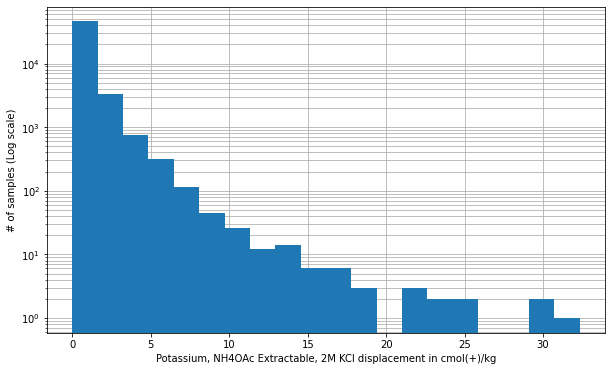

In [ ]:
# Histogram of exchangeabme potassium
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('Potassium, NH4OAc Extractable, 2M KCl displacement in cmol(+)/kg')
plt.ylabel('# of samples (Log scale)')
ax.grid(True, which='both')
ax.set_axisbelow(True)
ax.hist(y, bins=20, log=True, histtype='bar', cumulative=False);

### 2.2 Features (Mid-Infrared spectra)

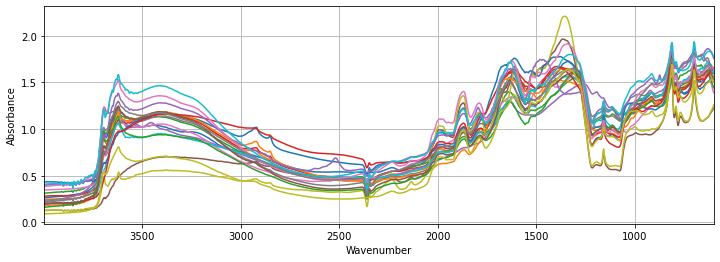

In [ ]:
plot_spectra(X, X_names, figsize=(12, 4), sample=20)

### 2.3 Count and distribution by Soil Taxonomy order

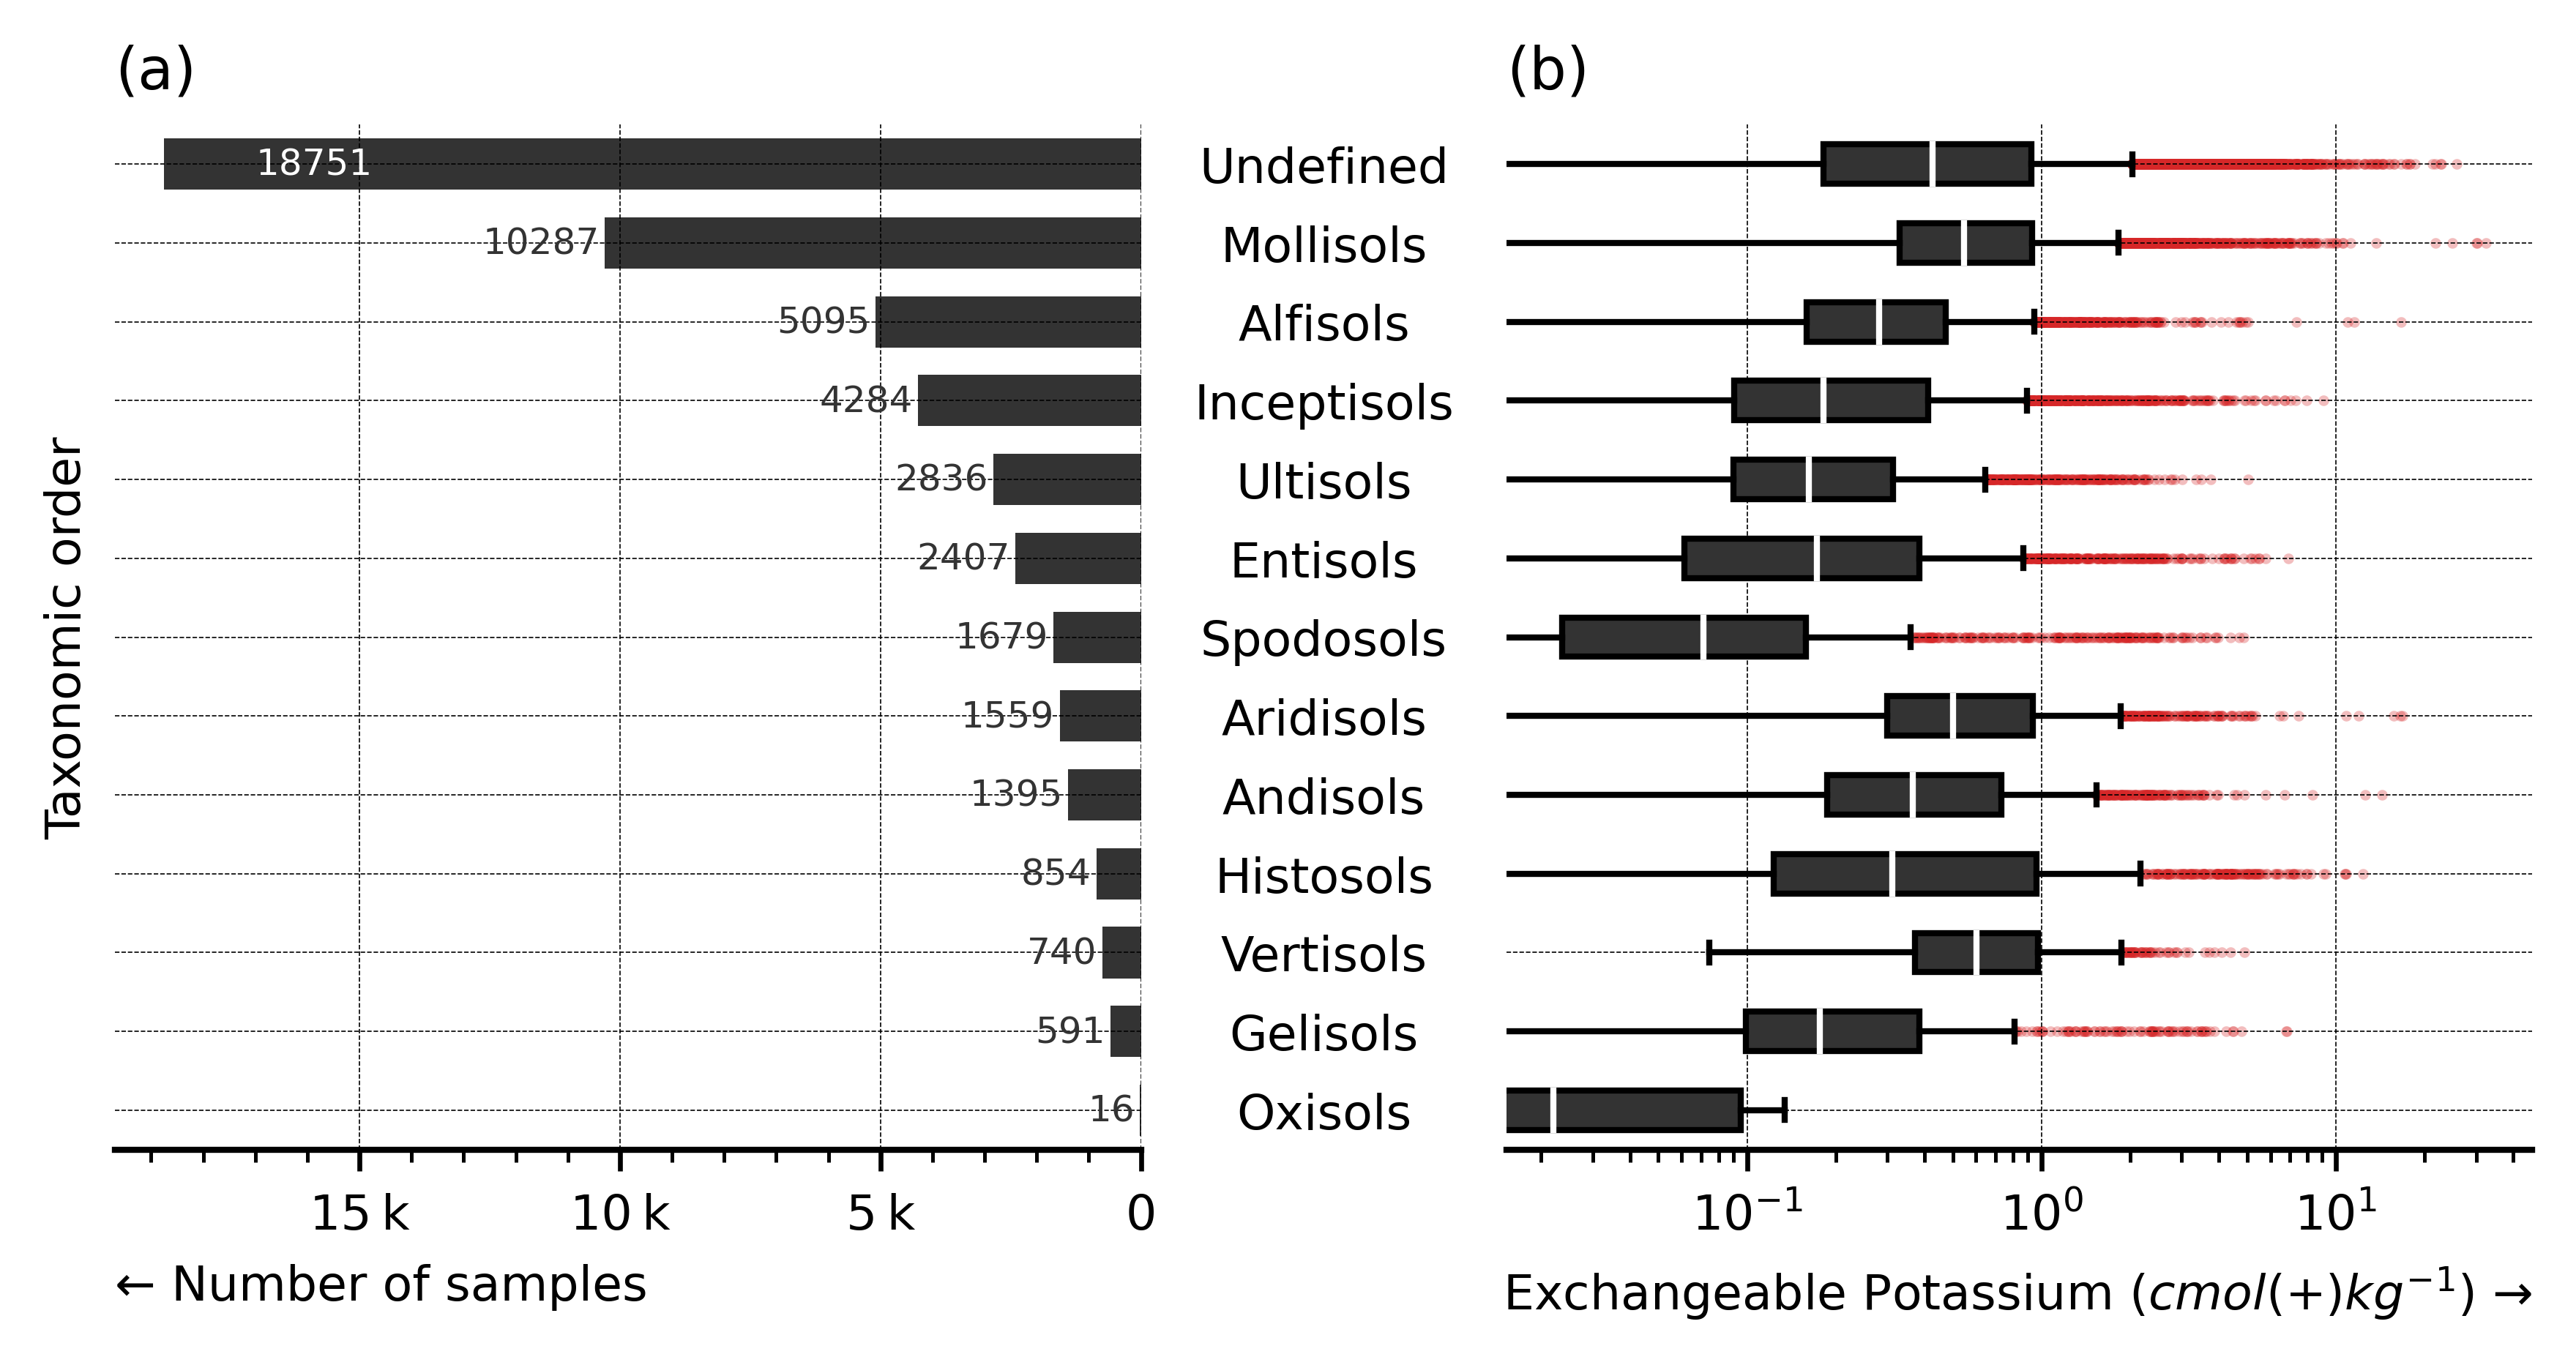

In [ ]:
summary_plot(y, depth_order, tax_lookup)